In [2]:
from __future__ import division
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import pandas as pd

In [46]:
nb_dir = '/home/dup193/work/double_pulse/stat_analysis'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from event_selection import EventSelectionPreCut, MakeSimSum,EventSelectionPreCutNoTail

In [4]:
secs_per_year = 31536000
LLH = -0.1
Qst1 = 1000
Qst2 = 10
Qst3 = 10
NET1 =0.99
NET2 =0.98
NET3 =0.85

In [5]:
print('Data')
data_b0= np.load('/fastio2/dasha/double_pulse/data_BurnSample_RF.npy', mmap_mode='r')
live_time_b = 1898429.5199999993
print("Events {0:.2f}+/-{1:.2f}".format(data_b0.shape[0],np.sqrt(data_b0.shape[0])))
#data_b2= np.load('/fastio2/dasha/double_pulse/data_BurnSample_128900_2.npy', mmap_mode='r')
#live_time_b2 = 4995.69

print('Corsika')
data_c0_x5 = np.load('/fastio2/dasha/double_pulse/data_ALL_CC_CNN_corsika.npy',mmap_mode='r')
print("Events {0:.2f}+/-{1:.2f}".format(sum(data_c0_x5['weight_val']*live_time_b),np.sqrt(np.sum(np.square(data_c0_x5['weight_val']*live_time_b)))))
print("Corsika, No ovesizing")
data_c0= np.load('/fastio2/dasha/double_pulse/data_20904_corsika_test.npy', mmap_mode='r')
print("Events {0:.2f}+/-{1:.2f}".format(sum(data_c0['weight_val']*live_time_b),np.sqrt(np.sum(np.square(data_c0['weight_val']*live_time_b)))))
print(data_c0.shape)
#Genie
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_1_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_1_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_1_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_3_1.npy',mmap_mode='r')
data_n0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuALL_2_1.npy',mmap_mode='r')
data_ac0 = np.load('/fastio2/dasha/double_pulse/data_AtmosConv.npy',mmap_mode='r')
data_ap0 = np.load('/fastio2/dasha/double_pulse/data_AtmosPrompt.npy',mmap_mode='r')

Data
Events 12899.00+/-113.57
Corsika
Events 10480.22+/-37.22
Corsika, No ovesizing
Events 5621.67+/-80.74
(59311,)


In [28]:
data_tc,data_mc,data_ec,data_eg,data_n,data_ac,data_ap,data_c = \
    EventSelectionPreCut(data_tc0,data_mc0,data_ec0,data_eg0,data_n0,data_ac0,data_ap0,data_c0)
print(data_tc0.shape,data_mc0.shape,data_ec0.shape,data_eg0.shape,data_n0.shape,data_ac0.shape,data_ap0.shape,data_c0.shape)
print(data_tc.shape,data_mc.shape,data_ec.shape,data_eg.shape,data_n.shape,data_ac.shape,data_ap.shape,data_c.shape)

(128278,) (462405,) (420185,) (4267,) (154981,) (1165870,) (708917,) (59311,)
(107627,) (79673,) (388076,) (2884,) (143478,) (643549,) (504026,) (59311,)


In [29]:
#prep the rest of the data
data_c0_x5 = data_c0_x5[np.isfinite(data_c0_x5['logan_veto']['SPE_rlogl']) & np.isfinite(data_c0_x5['logan_veto']['Cascade_rlogl'])]
maskl_c_x5 = data_c0_x5['logan_veto']['SPE_rlogl']-data_c0_x5['logan_veto']['Cascade_rlogl'] > LLH
data_c_x5 = data_c0_x5[maskl_c_x5]

data_b0 = data_b0[np.isfinite(data_b0['logan_veto']['SPE_rlogl']) & np.isfinite(data_b0['logan_veto']['Cascade_rlogl'])]
maskl_b = data_b0['logan_veto']['SPE_rlogl']-data_b0['logan_veto']['Cascade_rlogl'] > LLH
masklt_b = data_b0['logan_veto']['SPE_rlogl']-data_b0['logan_veto']['Cascade_rlogl'] < 0.5

data_b = data_b0[maskl_b]

In [30]:
#make df
data_b_label = [8]*len(data_b)
array_bs = np.array([data_b_label, data_b['qtot'],data_b['logan_veto']['SPE_rlogl']-data_b['logan_veto']['Cascade_rlogl'],\
                    data_b['qst']['q'][:,0],data_b['qst']['q'][:,1],data_b['qst']['q'][:,2],data_b['preds']['n1'],data_b['preds']['n2_1'],\
                    data_b['preds']['n3']]).T 
index_values_bs = range(len(array_bs))
column_values_bs = ['label', 'qtot', 'llh_diff', 'qst0','qst1','qst2','n1', 'n2', 'n3'] 
bs = pd.DataFrame(data = array_bs,  index = index_values_bs, columns = column_values_bs)

In [31]:
#Make the backround array
path = "/home/dup193/work/double_pulse/dataframes/"
sig, sim = MakeSimSum(data_tc,data_mc,data_ec,data_eg,data_n,data_ac,data_ap,data_c, path, livetime=secs_per_year,\
             weight_name='weight_val_0', weight_name_c = 'weight_val', wtype ='nom')

In [32]:
print(sig.shape, sim.shape, bs.shape)

(107627, 10) (1928624, 10) (12897, 9)


In [33]:
maskq_sig = (sig['qst0'] >= Qst1) & (sig['qst1'] >= Qst2) & (sig['qst2'] >= Qst3)
maskq_sim = (sim['qst0'] >= Qst1) & (sim['qst1'] >= Qst2) & (sim['qst2'] >= Qst3)
maskq_bs = (bs['qst0'] >= Qst1) & (bs['qst1'] >= Qst2) & (bs['qst2'] >= Qst3)

masks_sig = (sig['n1'] >= NET1) & (sig['n2'] >= NET2) & (sig['n3'] >= NET3) 
masks_sim = (sim['n1'] >= NET1) & (sim['n2'] >= NET2) & (sim['n3'] >= NET3) 
masks_bs = (bs['n1'] >= NET1) & (bs['n2'] >= NET2) & (bs['n3'] >= NET3) 

In [34]:
masks2_bs = (bs['n1'] <= 0.7) | (bs['n2'] <= 0.7) | (bs['n3'] <= 0.7) 

bs[maskq_bs & masks2_bs].shape
#bs[maskq_bs].shape

(2116, 9)

In [35]:
def Plot(sig,sim,bs,w_sig,w_sim,mask_sig,mask_sim,mask_bs,livetime,name,label,bins,scale,ylim,loc =1,use_mask= False, ratio = True):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    gs = gridspec.GridSpec(2,1, height_ratios=[3.5,2], wspace=0.04, hspace=0.04)
    ax = fig.add_subplot(gs[0])
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(scale)
    ax.set_yscale('log')
    ax.set_title(name, fontsize = 16)
    #ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16) 
    if use_mask:
        n_bs, _, _ = ax.hist(bs[mask_bs], histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "BurnSample")  
        n_sim, _, _ = ax.hist(sim[mask_sim], weights = w_sim[mask_sim]*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "SimSum")  
        er_sim, _ = np.histogram(sim[mask_sim], bins =bins, weights = (w_sim[mask_sim]*livetime)**2)
        n_sig, _, _ = ax.hist(sig[mask_sig], weights = w_sig[mask_sig]*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "NuTauCC")  
        er_sig, _ = np.histogram(sig[mask_sig], bins =bins, weights = (w_sig[mask_sig]*livetime)**2)   
    else:
        n_bs, _, _ = ax.hist(bs, histtype = 'step',edgecolor = 'k', lw =2,  bins = bins, label = "BurnSample")  
        n_sim, _, _ = ax.hist(sim, weights = w_sim*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "SimSum")  
        er_sim, _ = np.histogram(sim, bins =bins, weights = (w_sim*livetime)**2)
        n_sig, _, _ = ax.hist(sig, weights = w_sig*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "NuTauCC")  
        er_sig, _ = np.histogram(sig, bins =bins, weights = (w_sig*livetime)**2)   

    bin_centers = 0.5*(bins[1:] + bins[:-1])
    plt.errorbar(bin_centers, n_bs, yerr = np.sqrt(n_bs), lw =1, capsize = 2,fmt='.k')
    plt.errorbar(bin_centers, n_sim, yerr = np.sqrt(er_sim), lw =1, capsize = 2,fmt='.b')
    plt.errorbar(bin_centers, n_sig, yerr = np.sqrt(er_sig), lw =1, capsize = 2,fmt='.r')
    plt.legend(loc=loc)
    
    if ratio: 
        with np.errstate(divide='ignore', invalid='ignore'):
            b_rat = np.nan_to_num(n_bs/n_sim)
            err = b_rat*np.sqrt(np.nan_to_num(1/n_bs) + np.nan_to_num((np.sqrt(er_sim)/(n_sim))**2))
    
        ax = fig.add_subplot(gs[1])
        ax.set_xscale(scale)
        ax.set_yscale('log')
        #ax.set_title('Ratio BurnSample/Corsika', fontsize = 16)
        ax.set_ylim(10**(-1),10**(1))
        ax.set_xlabel(label, fontsize = 16)                                                              
        ax.set_ylabel("Ratio", fontsize = 16) 
        ax.axhline(y =1, ls = '--')
        plt.bar(bins[:-1],b_rat,np.diff(bins), yerr = err, capsize = 2, fill =False)
        #plt.errorbar(, ns, yerr = err, lw =1, capsize = 2,fmt='.k')

In [36]:
print('After Initial Cuts')
print("Burn sample events {0:.2f}+/-{1:.2f}".format(bs.shape[0],np.sqrt(bs.shape[0])))
print("SimSum events {0:.2f}+/-{1:.2f}".format(sum(sim['weight']*live_time_b),np.sqrt(np.sum(np.square(sim['weight']*live_time_b)))))
print("NuTauCC events {0:.2f}+/-{1:.2f}".format(sum(sig['weight']*live_time_b),np.sqrt(np.sum(np.square(sig['weight']*live_time_b)))))

After Initial Cuts
Burn sample events 12897.00+/-113.56
SimSum events 5642.58+/-80.74
NuTauCC events 3.87+/-0.02


In [37]:
print('After Initial Cuts')
print("Burn sample events {0:.2f}+/-{1:.2f}".format(bs[maskq_bs].shape[0],np.sqrt(bs[maskq_bs].shape[0])))
print("SimSum events {0:.2f}+/-{1:.2f}".format(sum(sim[maskq_sim]['weight']*live_time_b),np.sqrt(np.sum(np.square(sim[maskq_sim]['weight']*live_time_b)))))
print("NuTauCC events {0:.2f}+/-{1:.2f}".format(sum(sig[maskq_sig]['weight']*live_time_b),np.sqrt(np.sum(np.square(sig[maskq_sig]['weight']*live_time_b)))))

After Initial Cuts
Burn sample events 2120.00+/-46.04
SimSum events 1904.87+/-40.82
NuTauCC events 2.40+/-0.02


In [38]:
print('After CNN Cuts')
print("Burn sample events {0:.3f}+/-{1:.3f}".format(bs[maskq_bs & masks_bs].shape[0],np.sqrt(bs[maskq_bs & masks_bs].shape[0])))
print("SimSum events {0:.3f}+/-{1:.3f}".format(sum(sim[maskq_sim & masks_sim]['weight']*live_time_b),np.sqrt(np.sum(np.square(sim[maskq_sim & masks_sim]['weight']*live_time_b)))))
print("NuTauCC events {0:.3f}+/-{1:.3f}".format(sum(sig[maskq_sig & masks_sig]['weight']*live_time_b),np.sqrt(np.sum(np.square(sig[maskq_sig & masks_sig]['weight']*live_time_b)))))

After CNN Cuts
Burn sample events 0.000+/-0.000
SimSum events 0.047+/-0.001
NuTauCC events 0.045+/-0.001


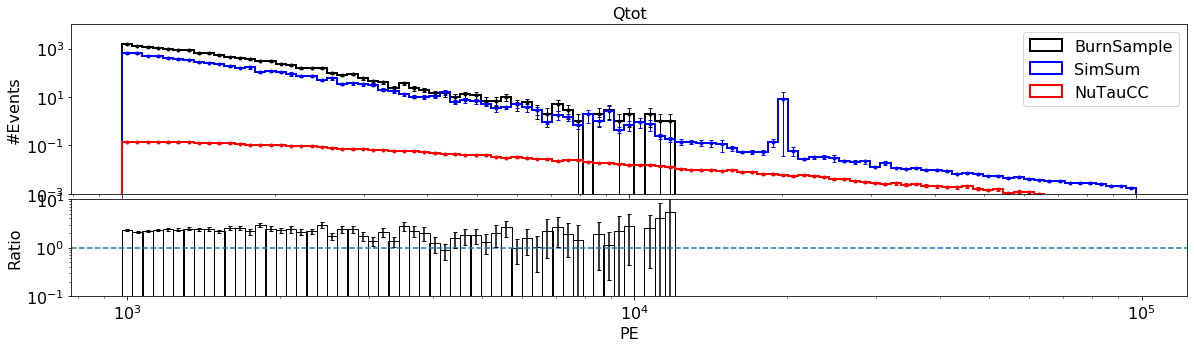

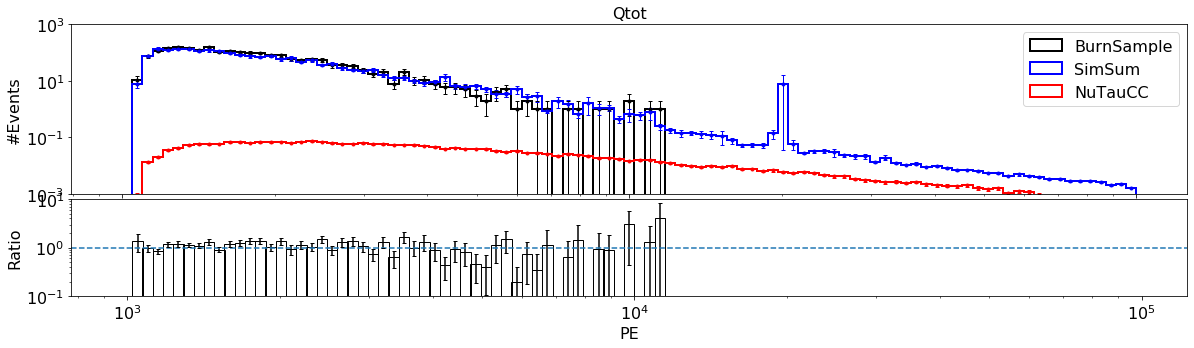

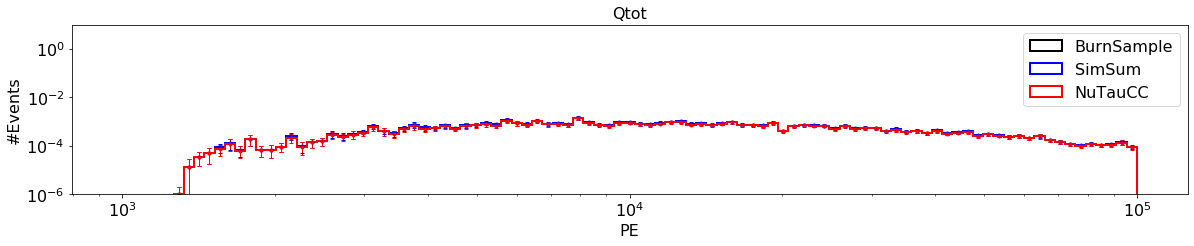

In [39]:
Plot(sig['qtot'],sim['qtot'],bs['qtot'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"Qtot","PE",ylim = [10**(-3),10**(4)],bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log')
Plot(sig['qtot'],sim['qtot'],bs['qtot'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"Qtot","PE",ylim = [10**(-3),10**(3)],bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log',use_mask= True)
Plot(sig['qtot'],sim['qtot'],bs['qtot'],sig['weight'],sim['weight'],maskq_sig & masks_sig, maskq_sim & masks_sim, maskq_bs & masks_bs, live_time_b,"Qtot","PE",ylim = [10**(-6),10**(1)],bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log',use_mask= True, ratio =False)

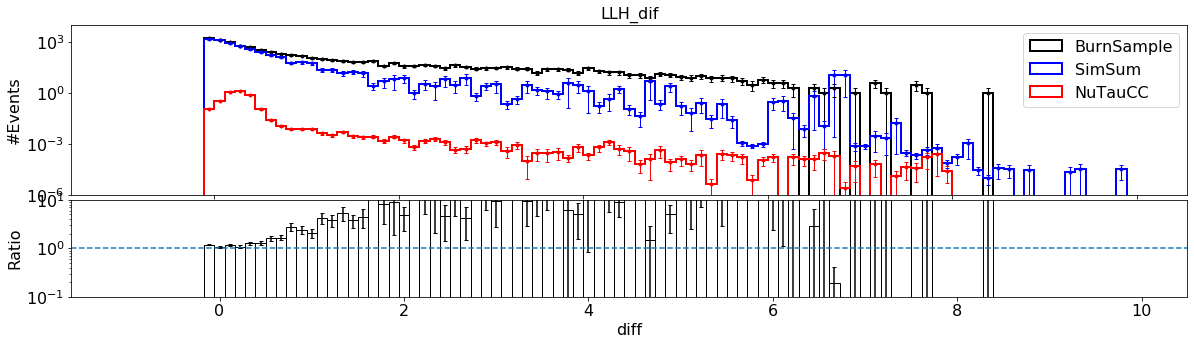

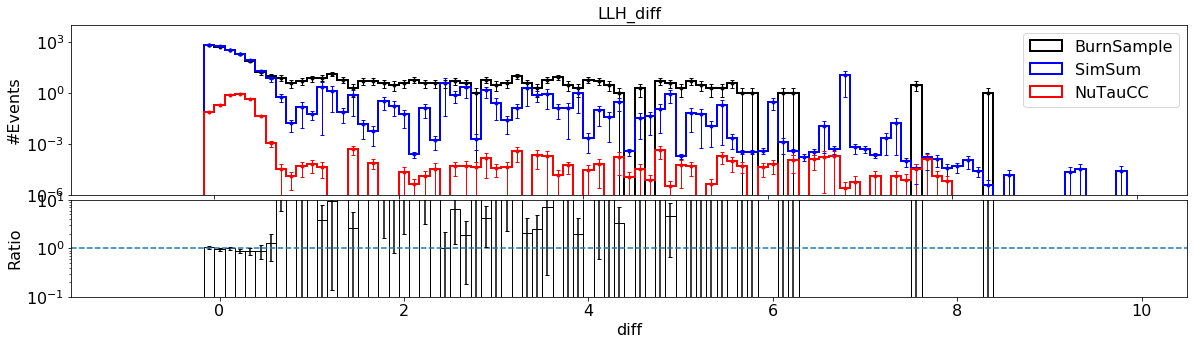

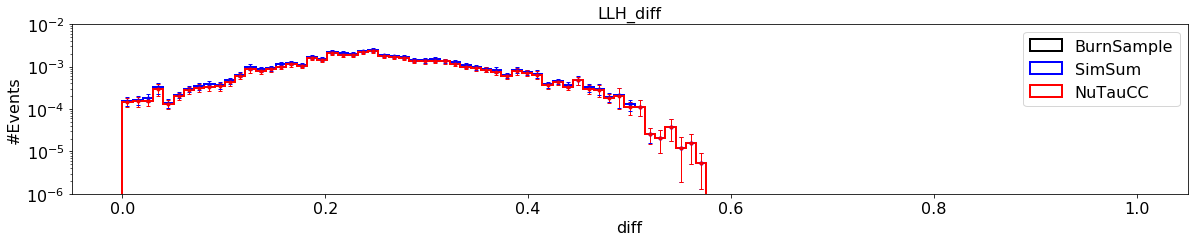

In [40]:
Plot(sig['llh_diff'],sim['llh_diff'],bs['llh_diff'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"LLH_dif","diff",ylim = [10**(-6),10**(4)],bins=np.linspace(-1,10,100),scale = 'linear')
Plot(sig['llh_diff'],sim['llh_diff'],bs['llh_diff'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"LLH_diff","diff",ylim = [10**(-6),10**(4)],bins=np.linspace(-1,10,100),scale = 'linear',use_mask= True)
Plot(sig['llh_diff'],sim['llh_diff'],bs['llh_diff'],sig['weight'],sim['weight'],maskq_sig & masks_sig, maskq_sim & masks_sim, maskq_bs & masks_bs,live_time_b,"LLH_diff","diff",ylim = [10**(-6),10**(-2)],bins=np.linspace(0,1,100),scale = 'linear',use_mask= True,ratio =False)

In [41]:
print(np.sum(sig['weight'][maskq_sig & masks_sig])*live_time_b)
mm = sig['llh_diff'] > 0.5
print(np.sum(sig['weight'][maskq_sig & masks_sig & mm])*live_time_b)
print(np.sum(sig['weight'][maskq_sig & masks_sig & mm])/np.sum(sig['weight'][maskq_sig & masks_sig]))


0.04452319361095249
0.0002617013962197849
0.0058778666801522425


/home/dup193/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3370: RuntimeWarning: overflow encountered in double_scalars
  high = [v + e for v, e in zip(data, b)]


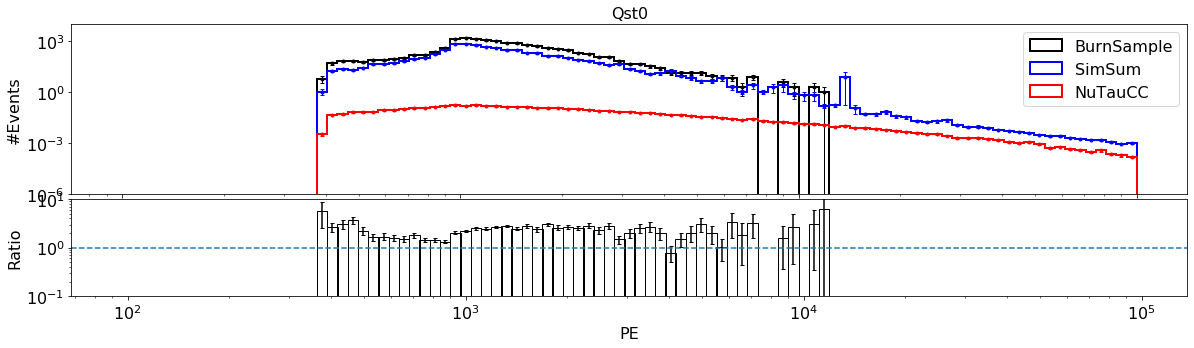

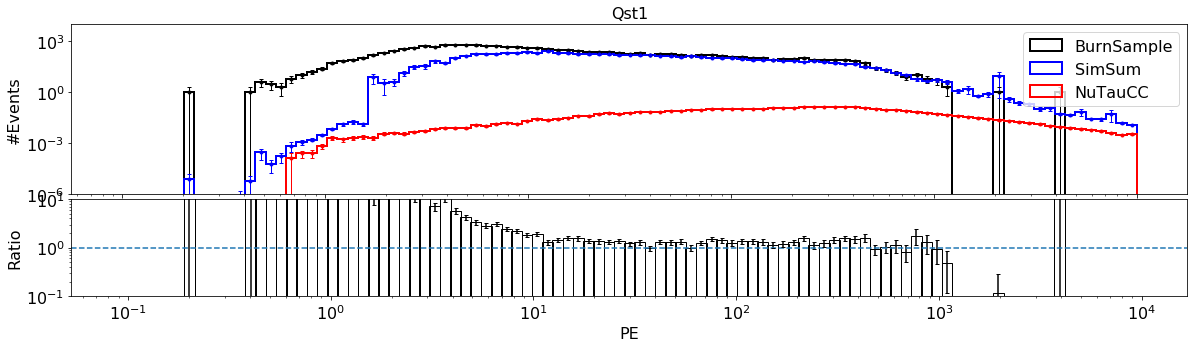

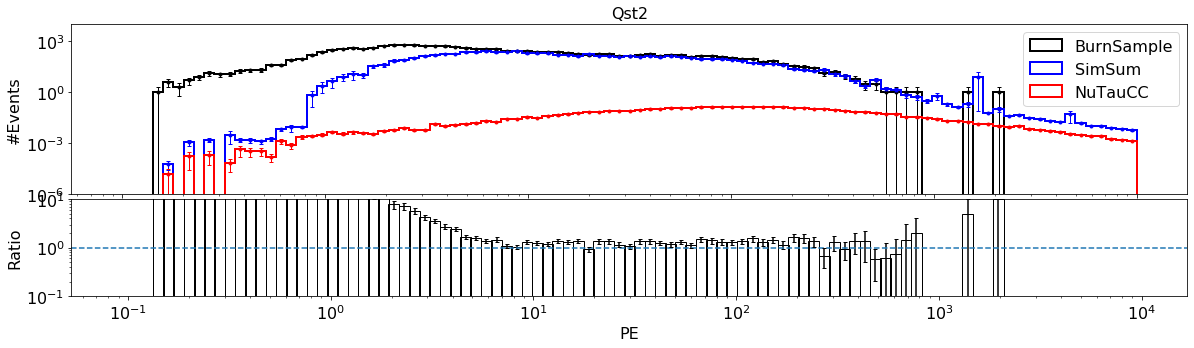

In [42]:
Plot(sig['qst0'],sim['qst0'],bs['qst0'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"Qst0","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(100),np.log10(100000),100),scale = 'log')
Plot(sig['qst1'],sim['qst1'],bs['qst1'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"Qst1","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(0.1),np.log10(10000),100),scale = 'log')
Plot(sig['qst2'],sim['qst2'],bs['qst2'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"Qst2","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(0.1),np.log10(10000),100),scale = 'log')

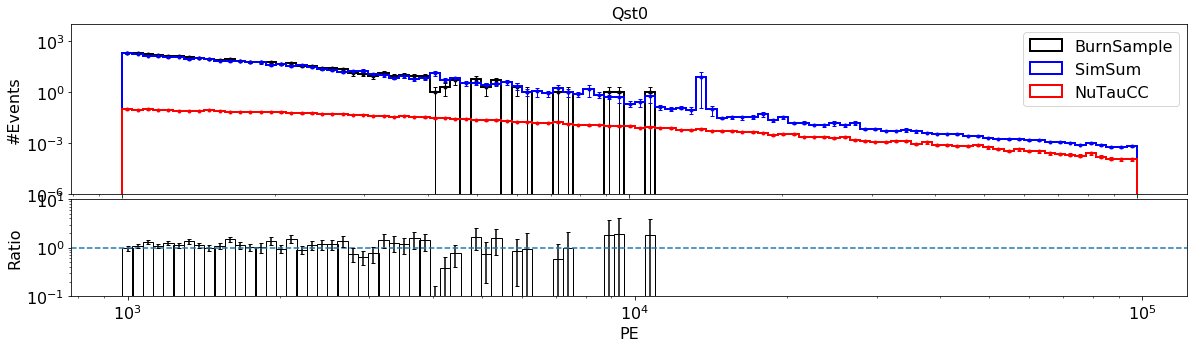

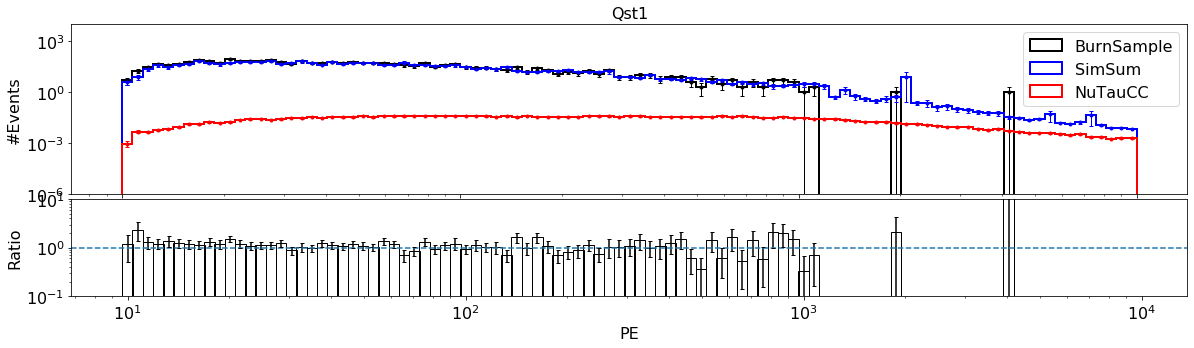

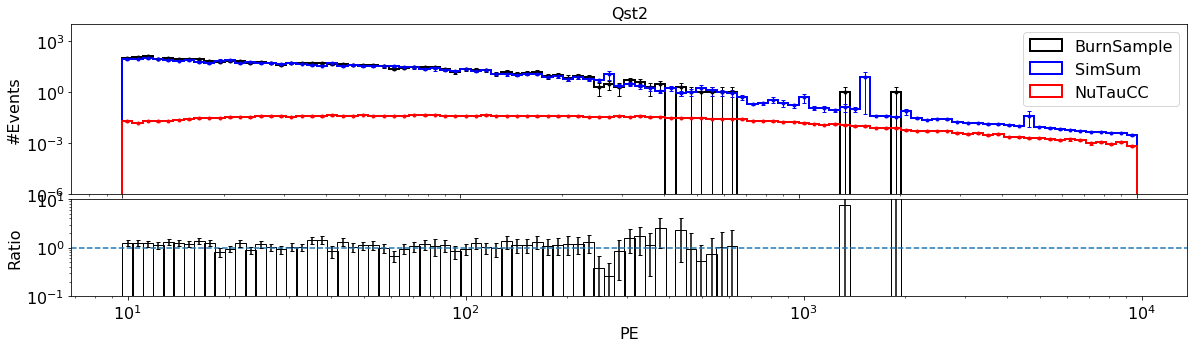

In [43]:
Plot(sig['qst0'],sim['qst0'],bs['qst0'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"Qst0","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log',use_mask= True)
Plot(sig['qst1'],sim['qst1'],bs['qst1'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"Qst1","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(10),np.log10(10000),100),scale = 'log',use_mask= True)
Plot(sig['qst2'],sim['qst2'],bs['qst2'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"Qst2","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(10),np.log10(10000),100),scale = 'log',use_mask= True)

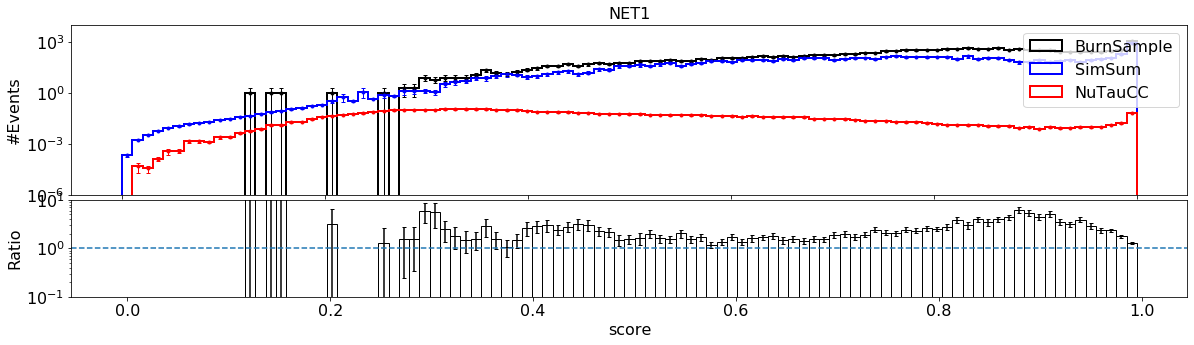

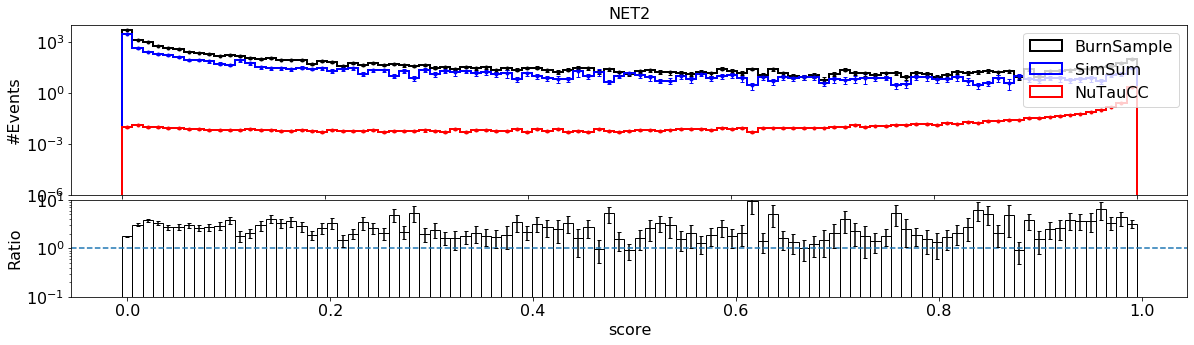

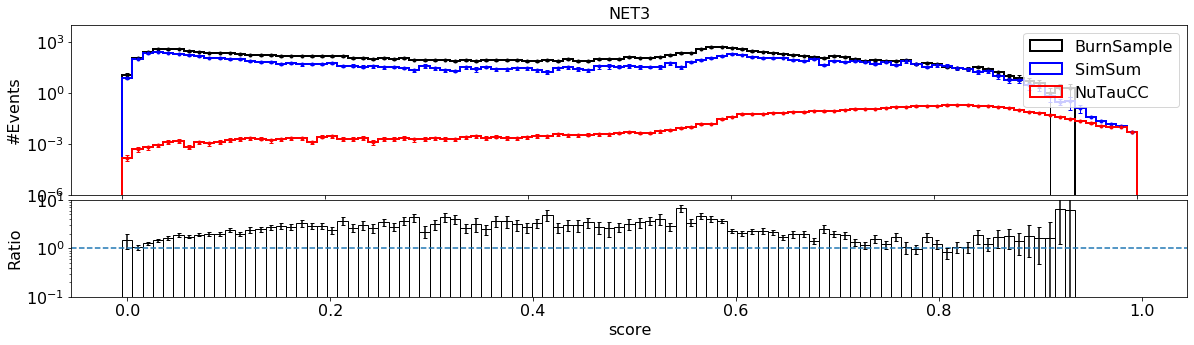

In [44]:
Plot(sig['n1'],sim['n1'],bs['n1'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET1","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0,1,100),scale = 'linear')
Plot(sig['n2'],sim['n2'],bs['n2'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET2","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0,1,100),scale = 'linear')
Plot(sig['n3'],sim['n3'],bs['n3'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET3","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0,1,100),scale = 'linear')


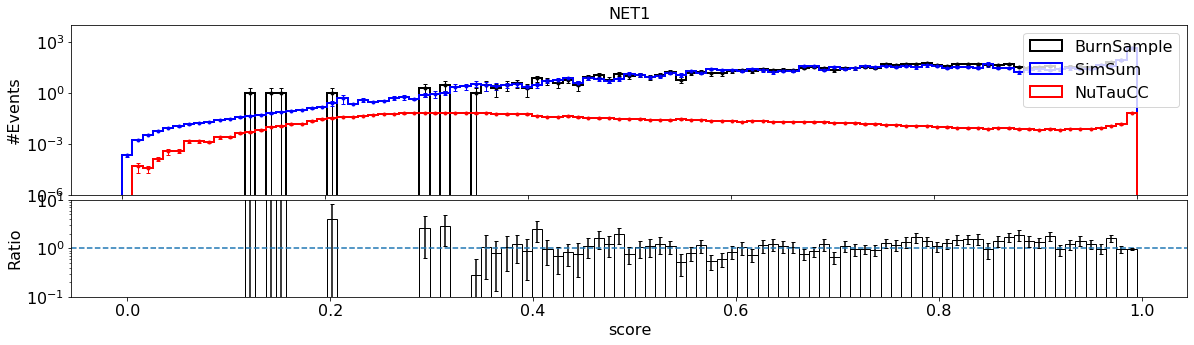

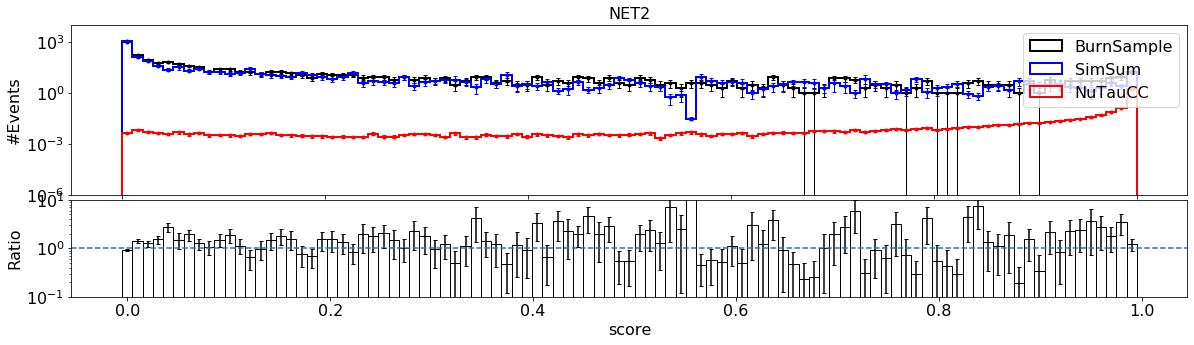

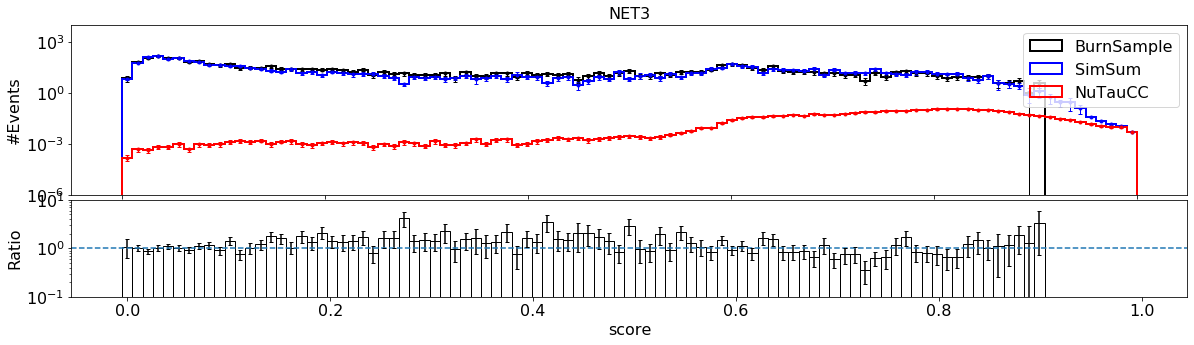

In [45]:
Plot(sig['n1'],sim['n1'],bs['n1'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET1","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0,1,100),scale = 'linear',use_mask= True)
Plot(sig['n2'],sim['n2'],bs['n2'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET2","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0,1,100),scale = 'linear',use_mask= True)
Plot(sig['n3'],sim['n3'],bs['n3'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET3","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0,1,100),scale = 'linear',use_mask= True)

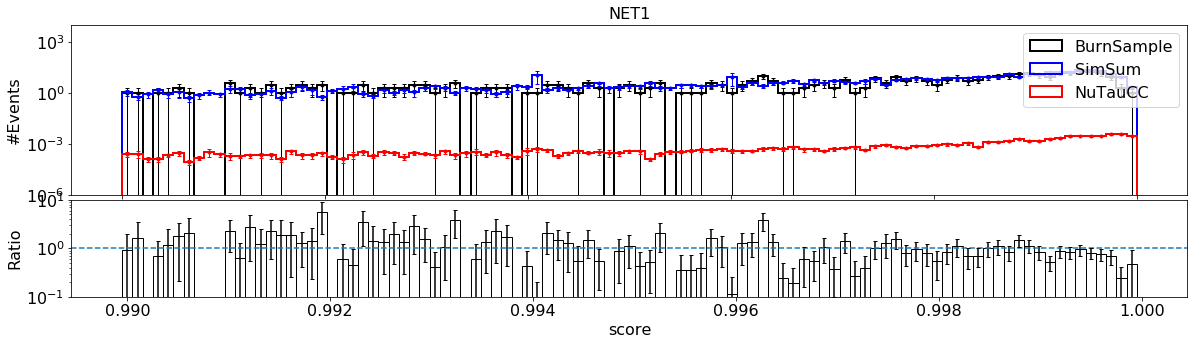

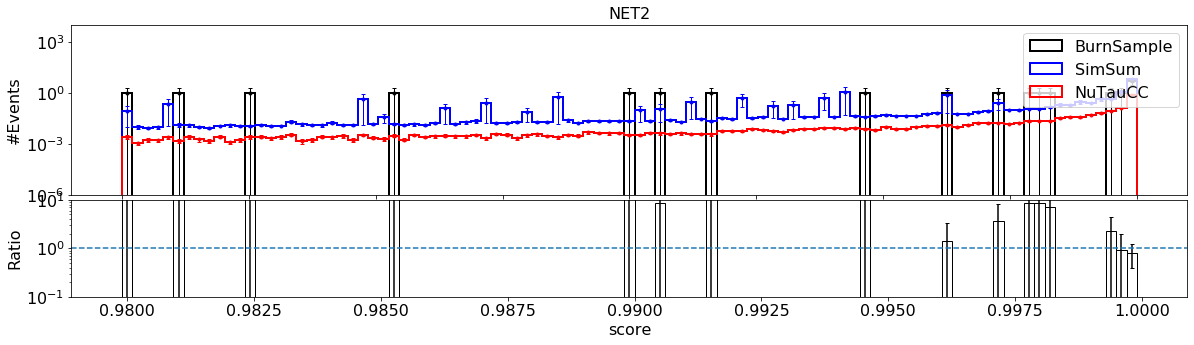

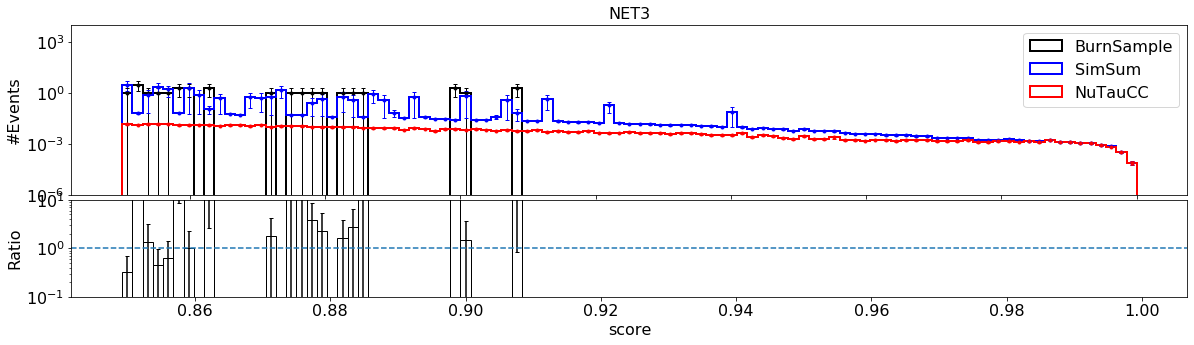

In [24]:
Plot(sig['n1'],sim['n1'],bs['n1'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET1","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0.99,1,100),scale = 'linear',use_mask= True)
Plot(sig['n2'],sim['n2'],bs['n2'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET2","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0.98,1,100),scale = 'linear',use_mask= True)
Plot(sig['n3'],sim['n3'],bs['n3'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs,live_time_b,"NET3","score",ylim = [10**(-6),10**(4)],bins=np.linspace(0.85,1,100),scale = 'linear',use_mask= True)

LLH distribbution tail

In [25]:
bs_tail = bs['llh_diff'] >0.5
print(bs.shape,bs[bs_tail].shape)
mbs = maskq_bs & bs_tail
print(bs.shape,bs[mbs].shape)

(5219, 9) (0, 9)
(5219, 9) (0, 9)


ValueError: min() arg is an empty sequence

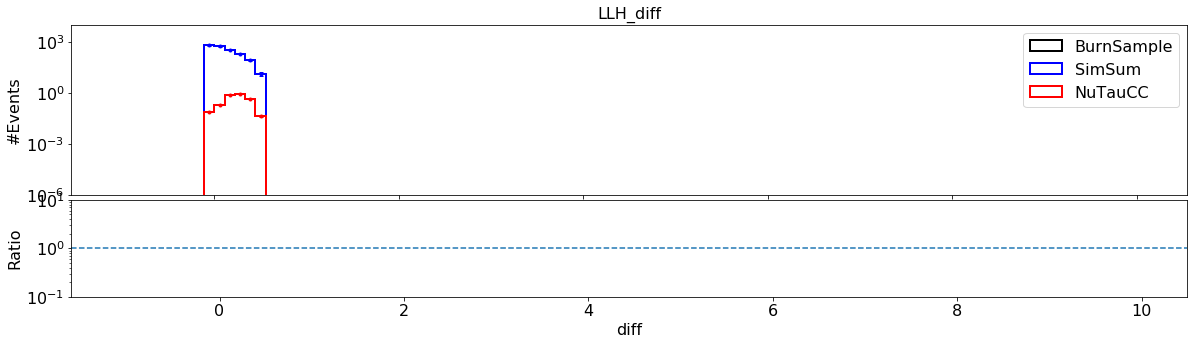

In [26]:
Plot(sig['llh_diff'],sim['llh_diff'],bs['llh_diff'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs & bs_tail,live_time_b,"LLH_diff","diff",ylim = [10**(-6),10**(4)],bins=np.linspace(-1,10,100),scale = 'linear',use_mask= True)

In [ ]:
Plot(sig['qtot'],sim['qtot'],bs['qtot'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs & bs_tail,live_time_b,"Qtot","PE",ylim = [10**(-3),10**(4)],bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log', use_mask= True)

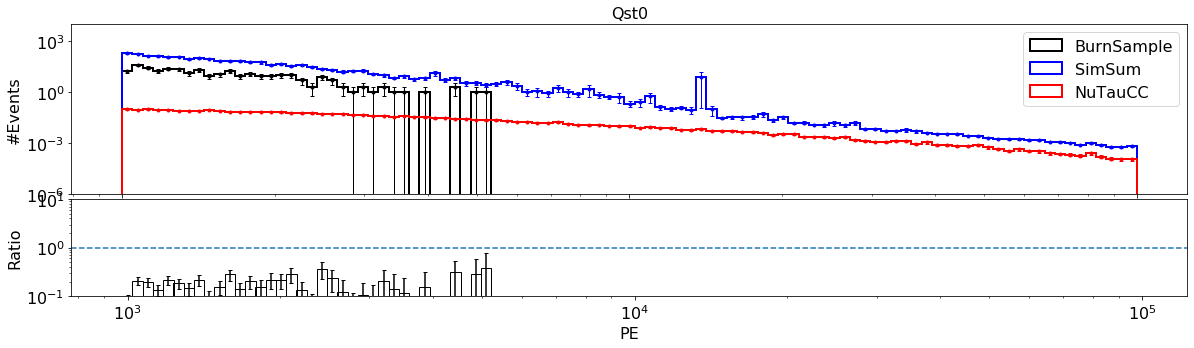

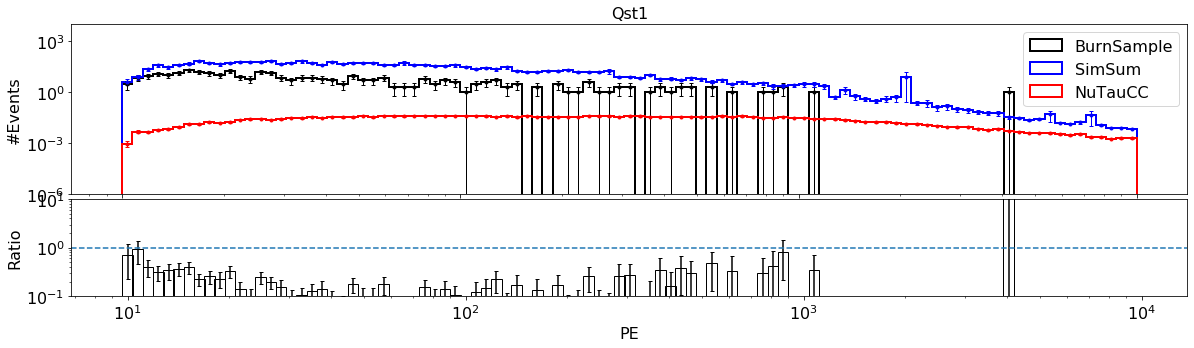

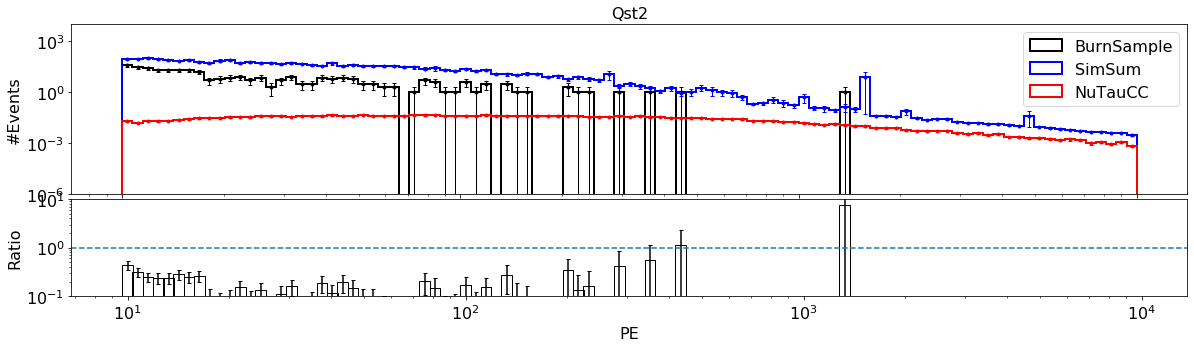

In [23]:
Plot(sig['qst0'],sim['qst0'],bs['qst0'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs & bs_tail,live_time_b,"Qst0","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(1000),np.log10(100000),100),scale = 'log',use_mask= True)
Plot(sig['qst1'],sim['qst1'],bs['qst1'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs & bs_tail,live_time_b,"Qst1","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(10),np.log10(10000),100),scale = 'log',use_mask= True)
Plot(sig['qst2'],sim['qst2'],bs['qst2'],sig['weight'],sim['weight'],maskq_sig,maskq_sim,maskq_bs & bs_tail,live_time_b,"Qst2","PE",ylim = [10**(-6),10**(4)],bins=np.logspace(np.log10(10),np.log10(10000),100),scale = 'log',use_mask= True)